In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
Epochs = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='D:/Potato Disease Classification/archive/PlantVillage_1',
    shuffle=True,
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))# did uint8 so that to convert it into float
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [8]:
len(dataset)

68

80% ==> train
10% ==> validation 10% ==> test

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val = 0.1
len(dataset)*val

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle= True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds , test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE,IMG_SIZE,IMG_SIZE,CHANNELS)
n_classes =3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32 ,(3,3), activation='relu' ,input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , kernel_size = (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , kernel_size = (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['acc']
)

In [26]:
history = model.fit(
    train_ds,
    epochs = Epochs,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50




54/54 [==============================] - 49s 815ms/step - loss: 0.8997 - acc: 0.4988 - val_loss: 0.8723 - val_acc: 0.5781
Epoch 2/50
54/54 [==============================] - 39s 720ms/step - loss: 0.7549 - acc: 0.6753 - val_loss: 0.7445 - val_acc: 0.6406
Epoch 3/50
54/54 [==============================] - 32s 589ms/step - loss: 0.4668 - acc: 0.8108 - val_loss: 0.3801 - val_acc: 0.8177
Epoch 4/50
54/54 [==============================] - 34s 637ms/step - loss: 0.3688 - acc: 0.8513 - val_loss: 0.5288 - val_acc: 0.7865
Epoch 5/50
54/54 [==============================] - 39s 731ms/step - loss: 0.4279 - acc: 0.8299 - val_loss: 0.3822 - val_acc: 0.8490
Epoch 6/50
54/54 [==============================] - 37s 673ms/step - loss: 0.1984 - acc: 0.9236 - val_loss: 0.6768 - val_acc: 0.7917
Epoch 7/50
54/54 [==============================] - 36s 660ms/step - loss: 0.1678 - acc: 0.9363 - val_loss: 0.2371 - val_acc: 0.9062
Epoch 8/50
54/54 [==============================] - 36s 660ms/step - loss: 0.1

In [27]:
score = model.evaluate(test_ds)

8/8 [==============================] - 4s 150ms/step - loss: 0.0498 - acc: 0.9871


In [28]:
score

[0.04975754767656326, 0.9870689511299133]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

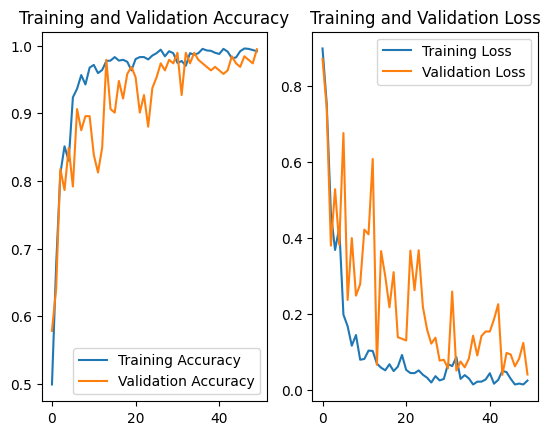

In [33]:
plt.subplot(1,2,1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

First image to Predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 401ms/step
predicted label: Potato___Early_blight


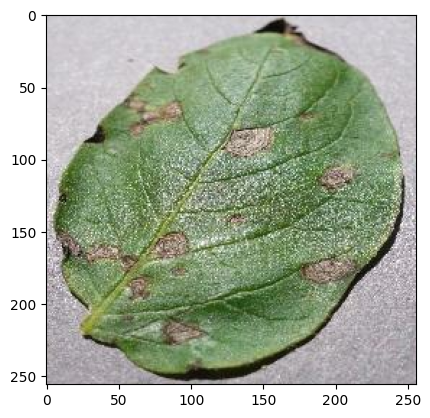

In [34]:
for images_batch , label_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0]
    
    print("First image to Predict")
    plt.imshow(first_image)
    print('actual label:',class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 34ms/step


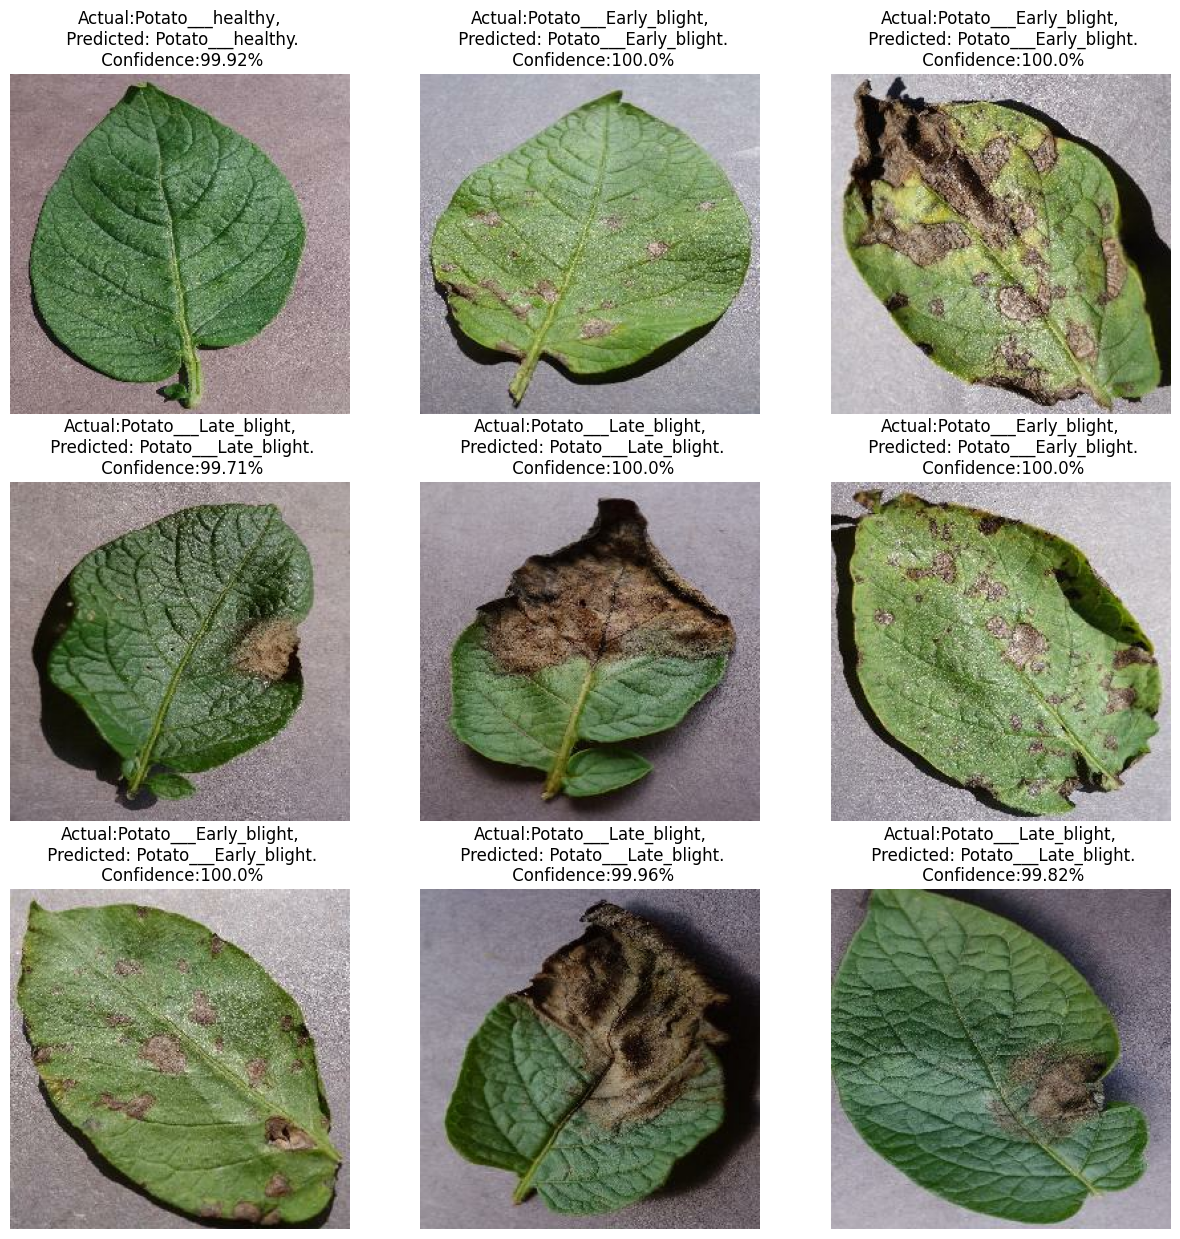

In [36]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence:{confidence}%")
        plt.axis('off')

In [37]:
#my_model = model.save('/kaggle/working/my_model.h5')

import pickle
pickle.dump(model, open('D:\Potato Disease Classification\model\model_1.pkl', 'wb'))

In [38]:
pickeled_model = pickle.load(open('D:\Potato Disease Classification\model\model_1.pkl','rb'))
pickeled_model.predict(test_ds)

8/8 [==============================] - 1s 143ms/step


array([[3.82956241e-05, 9.99959588e-01, 2.12076134e-06],
       [1.00000000e+00, 8.88565310e-09, 1.43062171e-14],
       [1.00000000e+00, 3.29777143e-11, 4.12259103e-21],
       [1.00000000e+00, 6.98878122e-10, 2.02165430e-20],
       [9.97242842e-06, 9.99989986e-01, 4.56787461e-08],
       [1.00000000e+00, 1.22138708e-08, 8.71933751e-14],
       [9.99998808e-01, 1.17483376e-06, 8.89045282e-10],
       [9.99999881e-01, 1.25160824e-07, 5.62123861e-13],
       [2.21552188e-03, 9.97784436e-01, 6.09824227e-08],
       [1.00000000e+00, 1.56164318e-10, 4.32774596e-21],
       [5.14190106e-06, 9.99993682e-01, 1.23176687e-06],
       [8.83171288e-06, 9.99959588e-01, 3.15333709e-05],
       [1.96855945e-06, 9.99997973e-01, 3.59045167e-08],
       [3.35516175e-04, 9.99659419e-01, 5.06383185e-06],
       [7.92651281e-06, 1.02616625e-03, 9.98965859e-01],
       [2.00230224e-05, 1.84910721e-03, 9.98130977e-01],
       [1.18037099e-06, 9.99996424e-01, 2.42696069e-06],
       [6.80647267e-04, 9.99263